# Abgabe 2: Klassische Mechanik 2

**Teammitglieder:** René Zarwel, Michael Wimmer, Matthias Kastenmüller

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import array, polyval, polyfit
from scipy.optimize import curve_fit

## Aufgabe 1: Umlaufzeit

`<INSERT DESCRIPTION HERE>`

C=17.046411581708377 und n=1.508036297446902
Für den Wert T=6.2 ergibt sich ein r=0.5113672986808556


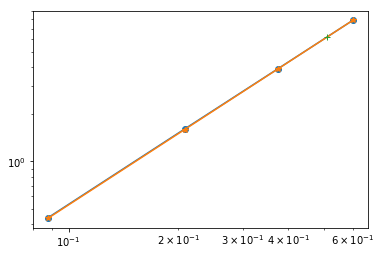

In [13]:
# Gegebene Funktion & Umgestellt nach r
T = lambda r,C,n: C*r**n
r = lambda T,C,n: (T/C)**(1/n)

# Eingangsdaten
Tdata = array([0.44, 1.61, 3.88, 7.89])
rdata = array([0.088, 0.208, 0.374, 0.600])

plt.loglog(rdata, Tdata, 'o-')

# Logarithmieren der Eingangsdaten
TdataLog = np.log(Tdata)
rdataLog = np.log(rdata)

# Lösen durch Geradengleichung
n = (TdataLog[0]-TdataLog[1])/(rdataLog[0]-rdataLog[1])
C = Tdata[3]/rdata[3]**n
print("C=" + str(C) + " und n=" + str(n))
plt.loglog(rdata, T(rdata,C,n), '*-')

# Berechnung des fehlenden Wertes
Tmiss = 6.20
rmiss = r(6.2,C,n)
print("Für den Wert T=" + str(Tmiss) + " ergibt sich ein r=" + str(rmiss))
plt.loglog(rmiss, Tmiss, '+')

## Aufgabe 6: Drei Sterne

Auf den Stern 1 wirkt die Anziehungskraft von Stern 2 und Stern 3. Zusammen ergeben sie die auf den Stern 1 wirkende Kraft:

$$
\vec{F_1} = m_1 \cdot \ddot{r} = \vec{F_{12}} + \vec{F_{13}}
$$

Damit kann jede wirkende Anziehungskraft separat betrachtet werden. Durch einsetzen der jeweils wirkenden Anziehungskraft ergibt sich folgende Gleichung:

$$
m_1 \cdot \ddot{r} = G\frac{m_2 \cdot m_1}{r_{12}^3}\vec{r_{12}} + G\frac{m_3 \cdot m_1}{r_{13}^3}\vec{r_{13}}
$$

Da $m_1$ auf der rechten Seite ausgeklammert werden kann und somit auf beiden Seiten gleichermaßen vorkommt, kann es aufgehoben werden. Desweiteren ersetzen wir die Richtungsvektoren $\vec{r_{12}}$ und $\vec{r_{13}}$ durch die Berechnung aus den Positionsvektoren. Gleichermaßen wird mit den im Nenner vorhandenen Längen der Richtungsvektoren verfahren. Somit ergibt sich die gegebene Gleichung:

$$
\ddot{\vec{r_1}} = Gm_2\frac{\vec{r_2}-\vec{r_1}}{|\vec{r_2}-\vec{r_1}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_1}}{|\vec{r_3}-\vec{r_1}|^3}
$$

Allgemein kann die Gleichung auch folgendermaßen fomuliert werden:

$$
\ddot{\vec{r_1}} = G \displaystyle\sum_{i=2}^{n} m_i\frac{\vec{r_i}-\vec{r_1}}{|\vec{r_i}-\vec{r_1}|^3} \\
n = Anzahl der Sterne
$$

Dies kann auf die anderen Sterne übertragen werden und somit ergeben sich für Stern 2 und 3 folgende Bewegungsgleichungen:

$$
\ddot{\vec{r_2}} = Gm_2\frac{\vec{r_1}-\vec{r_2}}{|\vec{r_1}-\vec{r_1}|^3}+Gm_3\frac{\vec{r_3}-\vec{r_1}}{|\vec{r_3}-\vec{r_1}|^3}
$$

# Kepler Gravitation

In [ ]:
import numpy as np     # get ODE solvers, numpy
import vpython as vp         # get VPython modules for animation
vec=vp.vector

def leapfrog(lfdiffeq, r0, v0, t, h):       # vectorized leapfrog
    """ vector leapfrog method using numpy arrays.
        It solves general (r,v) ODEs as: 
        dr[i]/dt = f[i](v), and dv[i]/dt = g[i](r).
        User supplied lfdiffeq(id, r, v, t) returns
        f[i](r) if id=0, or g[i](v) if id=1.
        It must return a numpy array if i>1 """
    hh = h/2.0
    r1 = r0 + hh*lfdiffeq(0, r0, v0, t)     # 1st: r at h/2 using v0    @\lbl{line:lf1}@
    v1 = v0 +  h*lfdiffeq(1, r1, v0, t+hh)  # 2nd: v1 using a(r) at h/2 @\lbl{line:lf2}@
    r1 = r1 + hh*lfdiffeq(0, r0, v1, t+h)   # 3rd: r1 at h using v1     @\lbl{line:lf3}@
    return r1, v1
  
     
def earth(id, r, v, t):            # return the eqns of motion
    if (id == 0): return v         # velocity, dr/dt
    s = vp.mag(vec(r[0],r[1],0))   # $s=|\vec{r}|$
    return -GM*r/(s*s*s)           # accel dv/dt, faster than s**3  
        
def go():
    r = np.array([1.017, 0.0])     # initial x,y position for earth   
    v = np.array([0.0, 6.179])     # initial vx, vy                   
    
    # draw the scene, planet earth/path, sun/sunlight               
    scene = vp.canvas(title='Planetary motion',          # scene start 
                       background=vec(.2,.5,1), forward=vec(0,2,-1))
    planet= vp.sphere(pos=vec(r[0],r[1],0), radius=0.1, make_trail=True, up=vec(0,0,1))
    sun   = vp.sphere(pos=vec(0,0,0), radius=0.2, color=vp.color.yellow)
    sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow) #scn end 
    
    t, h = 0.0, 0.001
    while True:
        vp.rate(200)   # limit animation speed
        r, v = leapfrog(earth, r, v, t, h)  # integrate 
        planet.pos = vec(r[0],r[1],0)           # move planet    

        
GM = 4*np.pi*np.pi          # G*Msun
go()
       
